# Solving the Taxi Problem Using SARSA

### Goal:

Say our agent is the driving the taxi. There are totally four locations and the agent has to
pick up a passenger at one location and drop at the another. The agent will receive +20
points as a reward for successful drop off and -1 point for every time step it takes. The agent
will also lose -10 points for illegal pickups and drops. So the goal of our agent is to learn to
pick up and drop passengers at the correct location in a short time without boarding any illegal
passengers.

First, we import all necessary libraries and initialize the environment

In [1]:
import random
import matplotlib.pyplot as plt
import gym
env = gym.make('Taxi-v3')

The environment is shown below, where the letters (R, G, Y, B) represents the different
locations and a tiny yellow colored rectangle is the taxi driving by our agent.

In [2]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+





Now, we initialize, Q table has a dictionary which stores state-action pair specifying value of performing an action in
a state s.

In [3]:
Q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        Q[(s,a)] = 0.0


Then, we define a function for performing epsilon-greedy policy. In epsilon-greedy policy, either we select best action with probability 1-epsilon or we explore new action with probability epsilon

In [4]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])



Now we initialize necessary variables

alpha - TD learning rate

gamma - discount factor <br>
epsilon - epsilon value in epsilon greedy policy

In [5]:
# bad parameters
# alpha = 0.85
# gamma = 0.90
# epsilon = 0.8

# good parameters
alpha = 0.4
gamma = 0.999
epsilon = 0.017

Now, we perform SARSA!!

In [6]:
all_rewards = []

for i in range(8000):
    
    # we store cumulative reward of each episodes in r
    r = 0
    
    # initialize the state,
    state = env.reset()
    
    # select the action using epsilon-greedy policy
    action = epsilon_greedy(state, epsilon)
    
    while True:
        # env.render()
        
        # then we perform the action and move to the next state, and receive the reward
        nextstate, reward, done, _ = env.step(action)
        
        # again, we select the next action using epsilon greedy policy
        nextaction = epsilon_greedy(nextstate, epsilon) 
    
        # we calculate the Q value of previous state using our update rule
        Q[(state, action)] += alpha * (reward + gamma * Q[(nextstate, nextaction)] - Q[(state, action)])

        # finally we update our state and action with next action and next state
        action = nextaction
        state = nextstate
        
        # store the rewards
        r += reward
        
        # we will break the loop, if we are at the terminal state of the episode
        if done:
            break
            
    #print("total reward: ", r)
    all_rewards.append(r)

env.close()


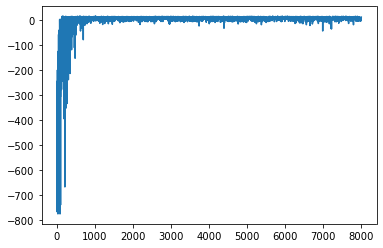

In [7]:
plt.plot(all_rewards)
plt.show()